In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'D:\bacancy\Bacancy\Heart_disease\data\raw\train.csv')

In [3]:
df.head()

,id,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,0,58,1,4,152,239,0,0,158,1,3.6,2,2,7,Presence
1,1,52,1,1,125,325,0,2,171,0,0.0,1,0,3,Absence
2,2,56,0,2,160,188,0,2,151,0,0.0,1,0,3,Absence
3,3,44,0,3,134,229,0,2,150,0,1.0,2,0,3,Absence
4,4,58,1,4,140,234,0,2,125,1,3.8,2,3,3,Presence


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630000 entries, 0 to 629999
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       630000 non-null  int64  
 1   Age                      630000 non-null  int64  
 2   Sex                      630000 non-null  int64  
 3   Chest pain type          630000 non-null  int64  
 4   BP                       630000 non-null  int64  
 5   Cholesterol              630000 non-null  int64  
 6   FBS over 120             630000 non-null  int64  
 7   EKG results              630000 non-null  int64  
 8   Max HR                   630000 non-null  int64  
 9   Exercise angina          630000 non-null  int64  
 10  ST depression            630000 non-null  float64
 11  Slope of ST              630000 non-null  int64  
 12  Number of vessels fluro  630000 non-null  int64  
 13  Thallium                 630000 non-null  int64  
 14  Hear

>We aim to build a supervised machine learning model to predict the presence of coronary artery disease using structured clinical features.
>
>The model will output calibrated probabilities and will be optimized primarily for recall and PR-AUC to minimize false negatives.
>
>The solution will be developed with full pipeline integrity to prevent data leakage and ensure deployment readiness.

In [5]:
df.shape

(630000, 15)

In [6]:
df.dtypes

id                           int64
Age                          int64
Sex                          int64
Chest pain type              int64
BP                           int64
Cholesterol                  int64
FBS over 120                 int64
EKG results                  int64
Max HR                       int64
Exercise angina              int64
ST depression              float64
Slope of ST                  int64
Number of vessels fluro      int64
Thallium                     int64
Heart Disease               object
dtype: object

In [7]:
df.columns

Index(['id', 'Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol',
       'FBS over 120', 'EKG results', 'Max HR', 'Exercise angina',
       'ST depression', 'Slope of ST', 'Number of vessels fluro', 'Thallium',
       'Heart Disease'],
      dtype='object')

In [8]:
df.describe()

,id,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000
mean,314999.500000,54.136706,0.714735,3.312752,130.497433,245.011814,0.079987,0.981660,152.816763,0.273725,0.716028,1.455871,0.451040,4.618873
std,181865.479132,8.256301,0.451541,0.851615,14.975802,33.681581,0.271274,0.998783,19.112927,0.445870,0.948472,0.545192,0.798549,1.950007
min,0.000000,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,157499.750000,48.000000,0.000000,3.000000,120.000000,223.000000,0.000000,0.000000,142.000000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,314999.500000,54.000000,1.000000,4.000000,130.000000,243.000000,0.000000,0.000000,157.000000,0.000000,0.100000,1.000000,0.000000,3.000000
75%,472499.250000,60.000000,1.000000,4.000000,140.000000,269.000000,0.000000,2.000000,166.000000,1.000000,1.400000,2.000000,1.000000,7.000000
max,629999.000000,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000


In [9]:
df.isnull().sum()

id                         0
Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df['Heart Disease'].value_counts()

Heart Disease
Absence     347546
Presence    282454
Name: count, dtype: int64

In [12]:
df['Heart Disease'].unique()

array(['Presence', 'Absence'], dtype=object)

In [13]:
mapping = {'Absence':0, 'Presence':1}

df['Heart Disease'] = df['Heart Disease'].map(mapping)

In [14]:
df['Heart Disease'].value_counts()

Heart Disease
0    347546
1    282454
Name: count, dtype: int64

In [15]:
df['Heart Disease'].describe()

count    630000.000000
mean          0.448340
std           0.497324
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: Heart Disease, dtype: float64

| Feature           | Type            | Key Stats          | Quick Insight                                              |
| ----------------- | --------------- | ------------------ | ---------------------------------------------------------- |
| Heart Disease     | Binary Target   | 44.8% positive     | Mild imbalance; accuracy still usable but recall important |
| Age               | Continuous      | 29–77 (mean 54)    | Realistic range; likely nonlinear risk increase            |
| Sex               | Binary          | 71% = 1            | Skewed toward one gender; check subgroup bias later        |
| Chest pain type   | Nominal (1–4)   | Median = 4         | Many asymptomatic cases; strong predictive candidate       |
| BP                | Continuous      | 94–200 (mean 130)  | No zero issues; hypertension likely important              |
| Cholesterol       | Continuous      | 126–564 (mean 245) | Right-skewed; possible transformation                      |
| FBS over 120      | Binary          | 8% positive        | Low prevalence; may be weak standalone signal              |
| EKG results       | Nominal (0–2)   | Spread across 0–2  | Likely moderate predictive power                           |
| Max HR            | Continuous      | 71–202 (mean 152)  | 202 may exceed theoretical limit; validate with Age        |
| Exercise angina   | Binary          | ~27% positive      | Clinically strong ischemia indicator                       |
| ST depression     | Continuous      | 0–6.2 (median 0.1) | Highly right-skewed; likely strong predictor               |
| Slope of ST       | Nominal (1–3)   | Mostly 1–2         | Categorical; do not treat as numeric magnitude             |
| Number of vessels | Ordinal (0–3)   | Mean 0.45          | Skewed toward 0; likely strong severity signal             |
| Thallium          | Nominal (3/6/7) | Median = 3         | Encoded categories; must OneHot                            |


In [16]:
df[df['Max HR']>220-df['Age']]

,id,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
1,1,52,1,1,125,325,0,2,171,0,0.0,1,0,3,0
18,18,65,0,4,140,197,0,0,161,0,2.2,2,1,3,1
20,20,62,1,4,110,197,0,0,172,0,2.2,2,3,3,1
22,22,57,0,3,124,204,0,2,166,0,0.0,1,0,3,0
23,23,52,1,3,94,185,0,0,172,0,0.0,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
629966,629966,53,0,3,140,204,0,0,171,0,0.2,1,0,3,0
629978,629978,51,0,4,120,233,0,2,174,0,0.0,2,0,3,0
629983,629983,41,1,3,140,243,0,2,181,0,0.0,2,2,3,0
629989,629989,61,1,3,150,234,0,2,161,1,1.0,2,0,3,1


You can present it like this:

- **Condition checked:** `MaxHR > (220 - Age)`
- **Rows matching condition:** `166,688`
- **Total rows:** `630,000`
- **Share of dataset:** `166,688 / 630,000 = 0.2646 ≈ 26.5%`

**Summary:** `166,688` rows (about **26.5%** of the dataset) have `MaxHR` greater than `(220 - Age)`.

In [17]:
columns = ['Chest pain type', 'Thallium','Slope of ST','EKG results']
for col in columns:
    print(f"{col} unique values: {df[col].value_counts()}")

Chest pain type unique values: Chest pain type
4    329179
3    197278
2     74941
1     28602
Name: count, dtype: int64
Thallium unique values: Thallium
3    372286
7    246748
6     10966
Name: count, dtype: int64
Slope of ST unique values: Slope of ST
1    358293
2    256215
3     15492
Name: count, dtype: int64
EKG results unique values: EKG results
0    320116
2    308562
1      1322
Name: count, dtype: int64


**Observations**
- EKG = 1 (~0.2%)
- Thallium = 6 (~1.7%)
- Slope = 3 (~2.4%)

- OneHotEncoding will create sparse dummy columns.
- Logistic regression may give unstable coefficients for rare categories.
- Tree models usually handle rare categories better

**Skewness Check (Continuous Features)**

In [18]:
# Continuous features
continuous_cols = ['Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression']

# Calculate skewness
skewness = df[continuous_cols].skew().sort_values(ascending=False)

print("Skewness of Continuous Features:")
print(skewness)


Skewness of Continuous Features:
ST depression    1.328429
BP               0.629283
Cholesterol      0.273150
Age             -0.164011
Max HR          -0.754556
dtype: float64


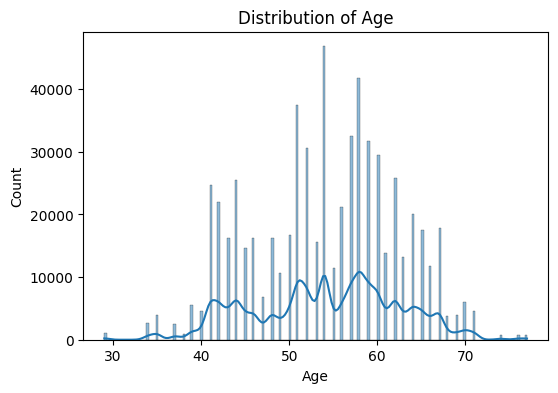

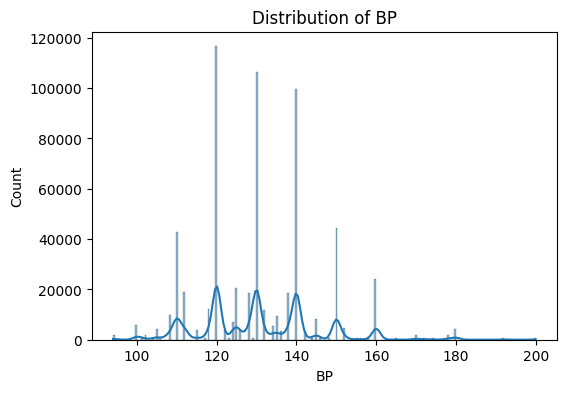

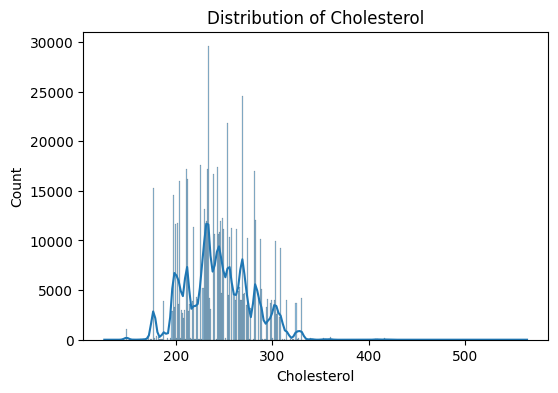

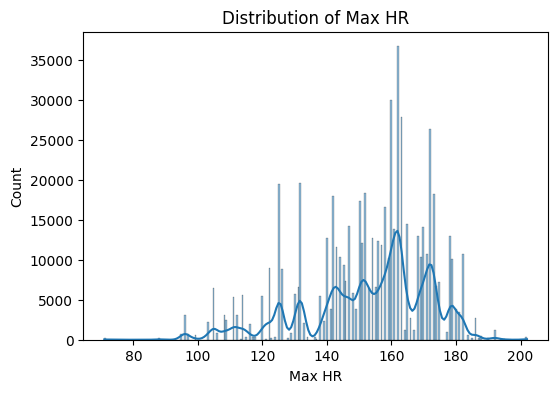

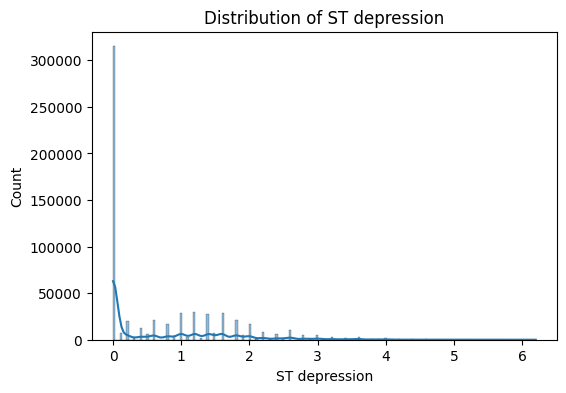

In [19]:
for col in continuous_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

**Observations**

- **ST Depression**
  - Highly right-skewed (`skew > 1`)
  - Large spike near `0`
  - Long right tail extending beyond `6`
  - Interpretation:
  - Most patients show little or no ST depression
  - A small subset has very high ischemia
  - Next step:
  - Keep as-is for now and evaluate model output first
  - Consider a log transform later if needed

- **BP** (`skew = 0.63`)
  - Moderately right-skewed (`0.5-1` range)
  - Most values concentrated around `120-140`
  - Mild right tail present

- **Cholesterol** (`skew = 0.27`)
  - Nearly symmetric distribution
  - Although max reaches `564`, most values cluster around `200-300`

- **Age** (`skew = -0.16`)
  - Nearly symmetric
  - Slight left skew, indicating relatively more older than younger patients

- **Max HR** (`skew = -0.75`)
  - Moderately left-skewed
  - Most values concentrated around `150-170`
  - Fewer observations at lower heart-rate values

Correlation with Target:
Heart Disease              1.000000
Thallium                   0.605776
Chest pain type            0.460684
Exercise angina            0.441864
Number of vessels fluro    0.438604
ST depression              0.430641
Slope of ST                0.415050
Sex                        0.342446
EKG results                0.218961
Age                        0.212091
Cholesterol                0.082753
FBS over 120               0.033570
id                         0.000209
BP                        -0.005181
Max HR                    -0.440985
Name: Heart Disease, dtype: float64


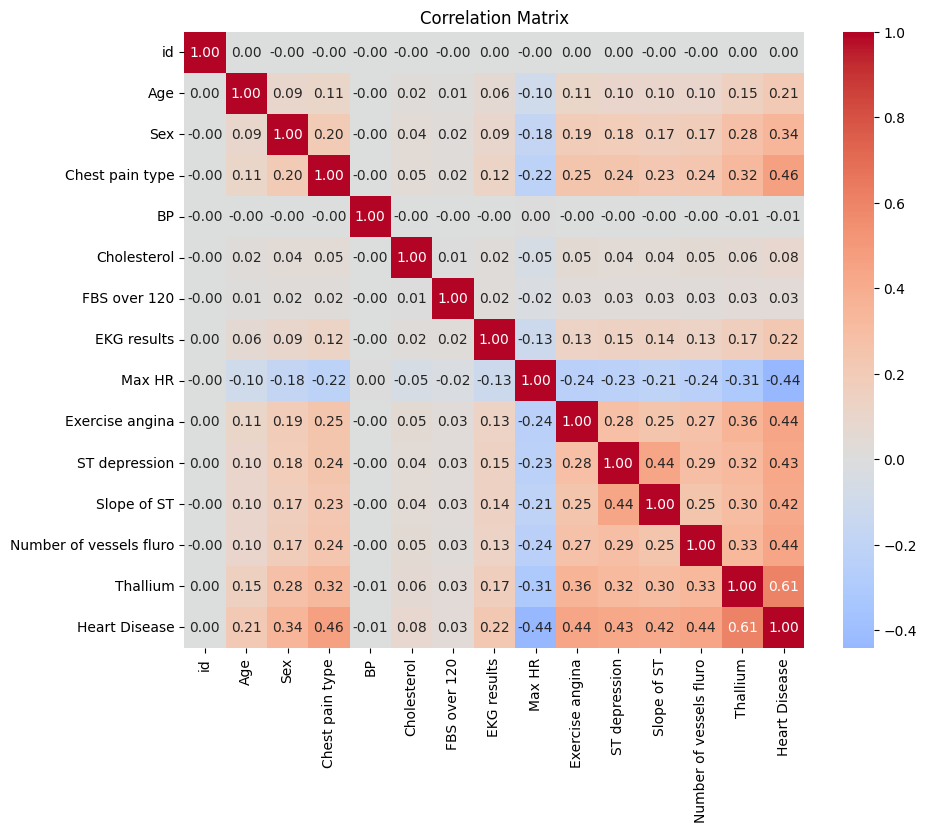

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation matrix (numeric columns only)
corr_matrix = df.corr(numeric_only=True)

# Print top correlations with target
target_corr = corr_matrix['Heart Disease'].sort_values(ascending=False)

print("Correlation with Target:")
print(target_corr)

# Optional heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, annot=True, fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


## Key Findings

---

### 1. Thallium is the Strongest Predictor
| Feature | Correlation |
|---|---|
| Thallium | **+0.61** |

- Highest positive correlation with Heart Disease.
- Thallium test result almost directly indicates disease presence.
- **The dataset is heavily driven by stress test findings.**

---

### 2. Max HR has a Strong Negative Correlation
| Feature | Correlation |
|---|---|
| Max HR | **−0.44** |

- Higher maximum heart rate → **lower disease probability**.
- Physiologically consistent: reduced HR capacity is a cardiac risk marker.

---

### 3. Cluster of Strong Cardiac / Stress-Test Features
The following features form a functionally related group — all exercise or stress-test derived:

| Feature | Nature |
|---|---|
| Chest pain type | Symptom-based |
| Exercise angina | Stress-test |
| ST depression | Stress-test |
| Slope of ST | Stress-test |
| Number of vessels (fluro) | Diagnostic |
| Thallium | Diagnostic |

> ⚠️ **Implication:** These features may carry redundant information. Consider dimensionality reduction or feature selection on this cluster.

---

### 4. BP and Cholesterol are Weak Linear Predictors
| Feature | Correlation |
|---|---|
| BP | **≈ 0.00** |
| Cholesterol | **+0.08** |

- Near-zero linear correlation with the target.
- **Does NOT mean they are useless** — non-linear models (trees, boosting) may still extract signal.
- Worth monitoring in feature importance post-modeling.

---

### 5. Multicollinearity Observations
| Feature Pair | Correlation |
|---|---|
| ST depression ↔ Slope of ST | **0.44** |
| Thallium ↔ Number of vessels | **0.33** |
| Exercise angina ↔ ST depression | **0.28** |
| Max HR ↔ several features | **Negative** |

> ⚠️ **Implication:** Moderate multicollinearity exists within the stress-test feature cluster. This matters for **Logistic Regression and SVM** (inflated coefficients) but is less of a concern for **tree-based models**. Consider VIF analysis before finalizing features for linear models.

---

| Insight | Action |
|---|---|
| Thallium dominates | Keep; monitor for data leakage if it's a post-diagnosis test |
| Stress-test cluster | Evaluate for redundancy via VIF / PCA |
| BP & Cholesterol weak | Retain for non-linear models; reconsider for linear |
| Multicollinearity present | Run VIF before Logistic Regression |

## VIF test

In [21]:

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


X = df.drop(columns=['id', 'Heart Disease'])



X_const = add_constant(X)


vif_data = pd.DataFrame()
vif_data["Feature"] = X_const.columns
vif_data["VIF"] = [
    variance_inflation_factor(X_const.values, i)
    for i in range(X_const.shape[1])
]

# Remove constant row
vif_data = vif_data[vif_data["Feature"] != "const"]

# Sort by VIF descending
vif_data = vif_data.sort_values(by="VIF", ascending=False)

print(vif_data)


                    Feature       VIF
13                 Thallium  1.427578
10            ST depression  1.374105
11              Slope of ST  1.321994
9           Exercise angina  1.250132
12  Number of vessels fluro  1.235152
3           Chest pain type  1.200287
8                    Max HR  1.179239
2                       Sex  1.122867
7               EKG results  1.054916
1                       Age  1.036104
5               Cholesterol  1.006748
6              FBS over 120  1.002215
4                        BP  1.000078


> All VIF values are between 1.00 and 1.43.

- That means:
    - No multicollinearity problem.
    - Features are largely independent.
    - Logistic regression will be numerically stable.
    - We do not need to drop any feature for collinearity reasons.

In [22]:
def numeric_feature_analysis(df, feature):
    summary = df.groupby('Heart Disease')[feature].agg(['mean', 'median', 'std'])
    print(f"\nSummary statistics for {feature} by Target:")
    print(summary)

    import seaborn as sns
    import matplotlib.pyplot as plt

    plt.figure(figsize=(6,4))
    sns.boxplot(x='Heart Disease', y=feature, data=df)
    plt.title(f"{feature} vs Heart Disease")
    plt.show()


Summary statistics for Age by Target:
                    mean  median       std
Heart Disease                             
0              52.558093    52.0  8.304120
1              56.079114    57.0  7.768723


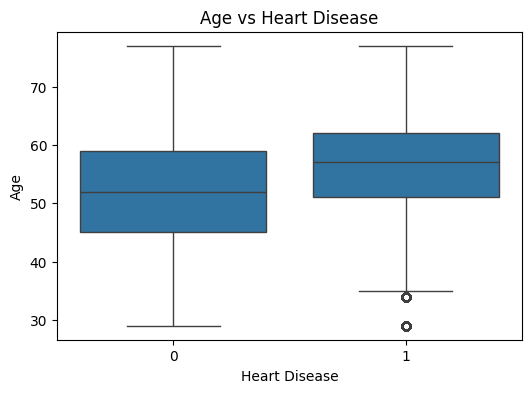


Summary statistics for BP by Target:
                     mean  median        std
Heart Disease                               
0              130.567381   130.0  15.135647
1              130.411366   130.0  14.776321


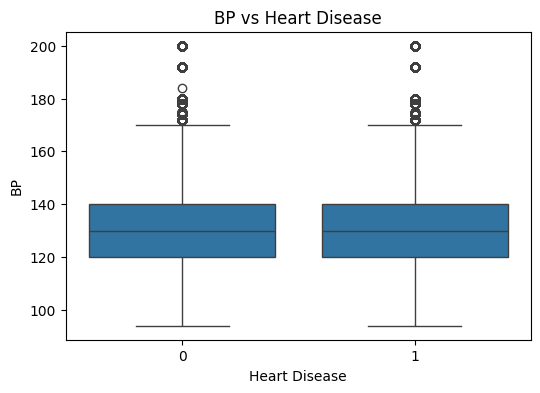


Summary statistics for Cholesterol by Target:
                     mean  median        std
Heart Disease                               
0              242.499102   239.0  34.080064
1              248.103585   246.0  32.922645


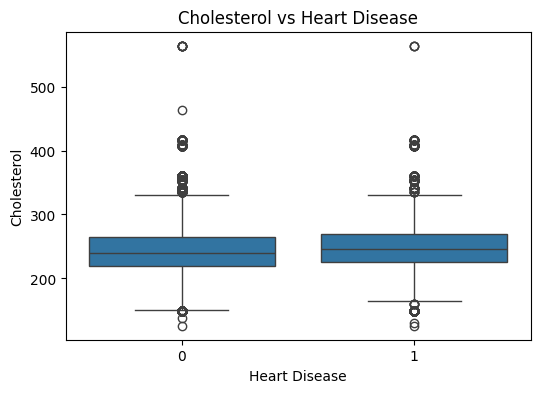


Summary statistics for Max HR by Target:
                     mean  median        std
Heart Disease                               
0              160.415105   162.0  14.740398
1              143.467372   146.0  19.722854


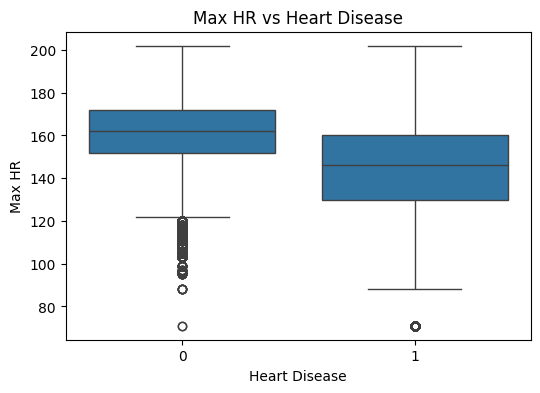


Summary statistics for ST depression by Target:
                   mean  median       std
Heart Disease                            
0              0.347808     0.0  0.634996
1              1.169104     1.2  1.066893


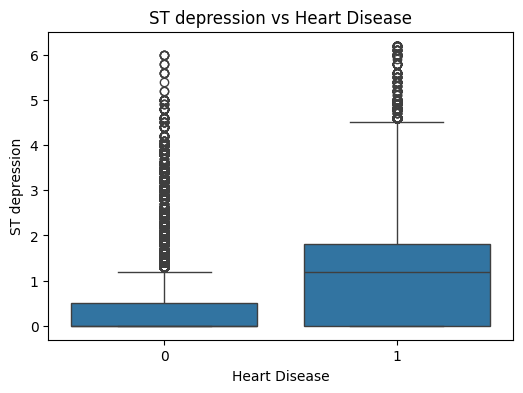

In [23]:
numeric_cols = ['Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression']

for col in numeric_cols:
    numeric_feature_analysis(df, col)


# Bivariate Analysis — Numeric Features vs Heart Disease

---

## Summary Statistics

| Feature | Mean (No Disease) | Mean (Disease) | Median (No Disease) | Median (Disease) | Correlation |
|---|---|---|---|---|---|
| Age | 52.6 | 56.1 | 52 | 57 | +0.21 |
| BP | 130.57 | 130.41 | 130 | 130 | ~0.00 |
| Cholesterol | 242.5 | 248.1 | 239 | 246 | +0.08 |
| Max HR | 160.4 | 143.5 | 162 | 146 | −0.44 |
| ST Depression | 0.35 | 1.17 | 0.00 | 1.20 | +0.43 |

---

## Feature-by-Feature Interpretation

### Age
- Mean shifts from 52.6 → 56.1 and median from 52 → 57 across groups.
- Separation is visible but overlap is large across the age range.
- Moderate predictor; consistent with correlation of +0.21.

---

### BP (Blood Pressure)
- Mean: 130.57 vs 130.41. Median: 130 vs 130. Distributions are nearly identical.
- No linear separation between groups whatsoever.
- Confirms near-zero correlation. **BP alone will not be predictive.**
- May still contribute signal through interaction terms (e.g., BP × Age, BP × Cholesterol).

---

### Cholesterol
- Small upward shift: mean 242.5 → 248.1, median 239 → 246.
- Heavy distributional overlap; difference is statistically marginal.
- Clinically surprising given cholesterol's established role in cardiovascular disease — this is a dataset-driven reality, not a clinical contradiction.
- Weak linear predictor (correlation +0.08); non-linear models may extract limited additional signal.

---

### Max HR
- Clear downward shift: mean 160.4 → 143.5, median 162 → 146.
- Strongest separation among all numeric features alongside ST depression.
- Lower max HR is strongly associated with disease presence — physiologically, reduced cardiac capacity under stress is a well-established risk indicator.
- Consistent with correlation of −0.44. **One of the top numeric predictors.**

---

### ST Depression
- Large shift: mean 0.35 → 1.17, median 0.00 → 1.20.
- Distribution separation is visually obvious; disease group is clearly elevated.
- Largest absolute mean difference among all numeric features.
- Consistent with correlation of +0.43. **Likely a top-3 feature overall.**

---

## Predictor Strength Ranking

| Rank | Feature | Strength | Direction |
|---|---|---|---|
| 1 | ST Depression | Strong | Positive |
| 2 | Max HR | Strong | Negative |
| 3 | Age | Moderate | Positive |
| 4 | Cholesterol | Weak | Positive |
| 5 | BP | Negligible | None |

---

## Key Observations

**On overlap:**
Even for the two strongest features — ST depression and Max HR — considerable distributional overlap exists between disease and no-disease groups. Single-feature thresholding will not produce a reliable classifier. The model must combine multiple signals to achieve meaningful separation.

**On physiological coherence:**
ST depression and Max HR are both products of stress test performance. Their dominance reinforces the earlier finding that this dataset is structurally stress-test heavy. Features derived from resting measurements (BP, Cholesterol) carry far less discriminative power in this particular dataset.

**On interaction potential:**
BP and Cholesterol show negligible standalone signal but should not be discarded prematurely. Tree-based and boosting models may find interaction effects that linear correlation fails to capture.

In [24]:
def categorical_feature_analysis(df, feature):
    cross_tab = pd.crosstab(df[feature], df['Heart Disease'], normalize='index')
    print(f"\nDisease proportion by {feature}:")
    print(cross_tab)

    cross_tab.plot(kind='bar', stacked=True, figsize=(6,4))
    plt.title(f"{feature} vs Heart Disease (Proportion)")
    plt.ylabel("Proportion")
    plt.show()



Disease proportion by Sex:
Heart Disease         0         1
Sex                              
0              0.821236  0.178764
1              0.444067  0.555933


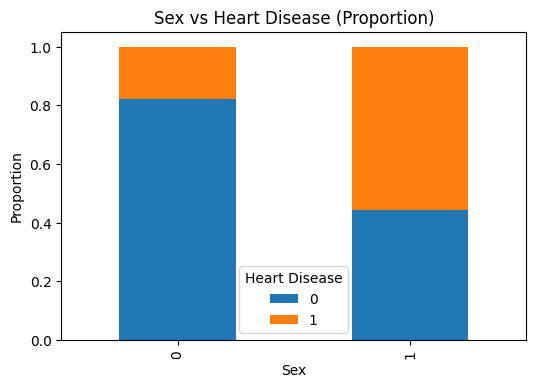


Disease proportion by Chest pain type:
Heart Disease           0         1
Chest pain type                    
1                0.891931  0.108069
2                0.837819  0.162181
3                0.809335  0.190665
4                0.302522  0.697478


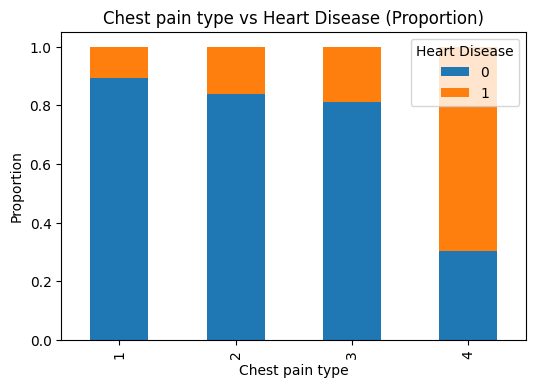


Disease proportion by FBS over 120:
Heart Disease         0         1
FBS over 120                     
0              0.556583  0.443417
1              0.495039  0.504961


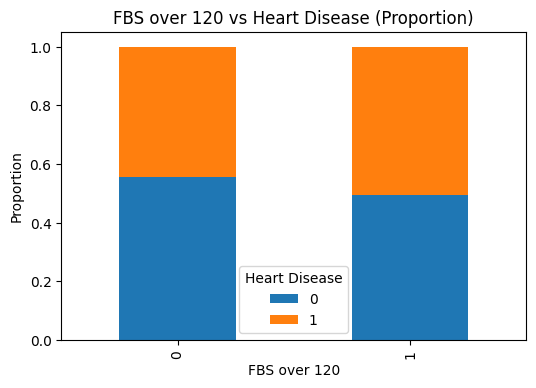


Disease proportion by EKG results:
Heart Disease         0         1
EKG results                      
0              0.658502  0.341498
1              0.639939  0.360061
2              0.440440  0.559560


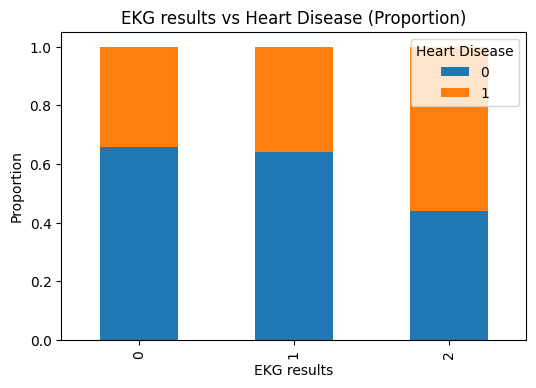


Disease proportion by Exercise angina:
Heart Disease           0         1
Exercise angina                    
0                0.686567  0.313433
1                0.193712  0.806288


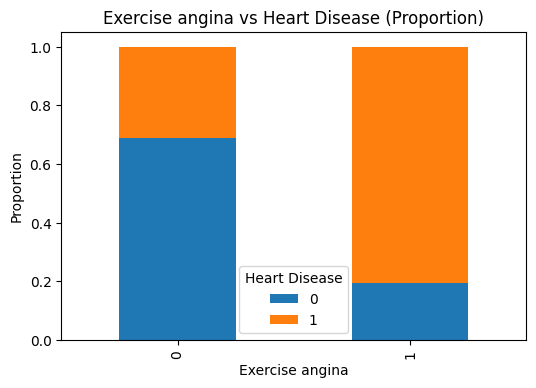


Disease proportion by Slope of ST:
Heart Disease         0         1
Slope of ST                      
1              0.737743  0.262257
2              0.307933  0.692067
3              0.278918  0.721082


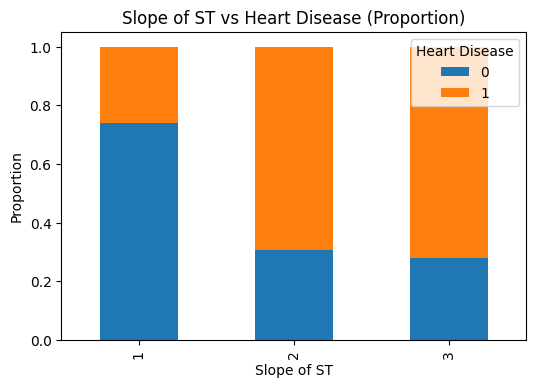


Disease proportion by Number of vessels fluro:
Heart Disease                   0         1
Number of vessels fluro                    
0                        0.696868  0.303132
1                        0.270654  0.729346
2                        0.102922  0.897078
3                        0.100451  0.899549


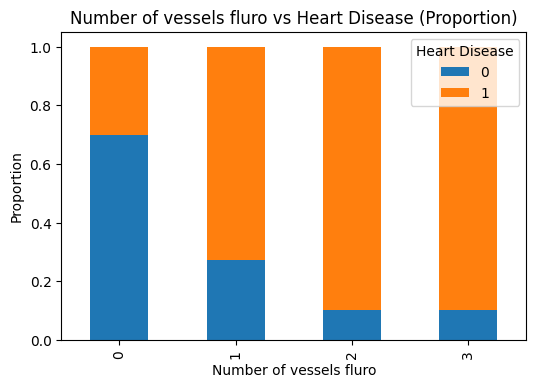


Disease proportion by Thallium:
Heart Disease         0         1
Thallium                         
3              0.801951  0.198049
6              0.313606  0.686394
7              0.184609  0.815391


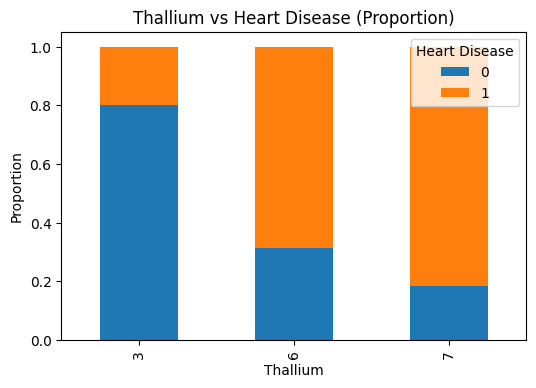

In [25]:
categorical_cols = [
    'Sex', 'Chest pain type', 'FBS over 120',
    'EKG results', 'Exercise angina',
    'Slope of ST', 'Number of vessels fluro',
    'Thallium'
]

for col in categorical_cols:
    categorical_feature_analysis(df, col)


# Bivariate Analysis — Categorical Features vs Heart Disease

---

## Disease Rate by Category

### Thallium

| Value | Disease Rate |
|---|---|
| 3 | 19.8% |
| 6 | 68.6% |
| 7 | 81.5% |

Clear risk gradient across all three values. The jump from value 3 to 6 alone represents a ~50 percentage point increase in disease rate.

---

### Number of Vessels (Fluoroscopy)

| Vessels | Disease Rate |
|---|---|
| 0 | 30.0% |
| 1 | 73.0% |
| 2 | 89.7% |
| 3 | 89.9% |

Near-monotonic increase. The relationship is almost perfectly ordinal — each additional vessel blocked corresponds to a higher disease rate. The plateau between 2 and 3 vessels suggests diminishing marginal risk beyond 2 blocked vessels, but both remain high-risk categories.

---

### Exercise Angina

| Value | Disease Rate |
|---|---|
| No | 31.0% |
| Yes | 80.6% |

Binary feature with a ~50 percentage point separation. Among the cleanest splits in the dataset.

---

### Chest Pain Type

| Type | Disease Rate |
|---|---|
| 1 | 10.8% |
| 2 | 16.2% |
| 3 | 19.1% |
| 4 | 69.7% |

Types 1–3 cluster at low risk (10–19%). Type 4 (asymptomatic) breaks sharply to 69.7%. Counter-intuitive clinically — asymptomatic presentation is highest risk — but a well-documented phenomenon where silent ischemia masks symptoms.

---

### Slope of ST

| Slope | Disease Rate |
|---|---|
| 1 | 26.0% |
| 2 | 69.0% |
| 3 | 72.0% |

Large jump from slope 1 to slope 2. Values 2 and 3 converge, suggesting they may behave similarly in a model. Consider grouping 2 and 3 as a single high-risk category during feature engineering.

---

## Summary by Signal Strength

| Strength | Feature | Disease Rate Range | Spread |
|---|---|---|---|
| Extremely Strong | Number of Vessels | 30% → 89.9% | ~60 pp |
| Very Strong | Thallium | 19.8% → 81.5% | ~62 pp |
| Very Strong | Exercise Angina | 31% → 80.6% | ~50 pp |
| Strong | Chest Pain Type | 10.8% → 69.7% | ~59 pp |
| Strong | Slope of ST | 26% → 72% | ~46 pp |
| Moderate | Sex | 18% → 55% | ~37 pp |
| Moderate | EKG Results | 34% → 56% | ~22 pp |
| Weak | FBS over 120 | 44% → 50% | ~6 pp |

> pp = percentage points spread between lowest and highest category disease rate.

---

## Key Observations

**Dataset is structurally dominated by stress-test and imaging features.**
The five strongest categorical predictors — Thallium, Number of Vessels, Exercise Angina, Chest Pain Type, Slope of ST — are all derived from exercise stress testing or cardiac imaging. This is not coincidental; the dataset was likely assembled in a clinical setting where these investigations were the primary diagnostic workup.

**Classic cardiovascular risk factors are weak here.**
BP, Cholesterol (from numeric analysis), and FBS (6 pp spread) show minimal discriminative power. This does not contradict their clinical importance in general population risk — it reflects that this dataset's population has already been selected for cardiac investigation, compressing the variation in those features.

**FBS is a candidate for removal.**
A 6 percentage point spread between FBS groups is negligible. Unless interaction effects emerge during modeling, FBS carries almost no standalone predictive value and may add noise rather than signal.

**Ordinality matters for Number of Vessels and Slope of ST.**
Both features show directional trends that should be respected during encoding. Use `OrdinalEncoder` with explicit category ordering rather than `OneHotEncoder`, which would destroy the directional information.

**Chest Pain Type 4 warrants special attention.**
The sharp discontinuity between types 1–3 and type 4 suggests this feature may behave more like a binary flag (Type 4 vs. Not Type 4) than a true 4-level ordinal. Consider engineering a binary `is_asymptomatic` feature alongside the original.

In [26]:
pd.crosstab(
    [df['Thallium'], df['Number of vessels fluro']],
    df['Heart Disease'],
    normalize='index'
)


Heart Disease                            0         1
Thallium Number of vessels fluro                    
3        0                        0.863678  0.136322
         1                        0.570446  0.429554
         2                        0.299025  0.700975
         3                        0.295447  0.704553
6        0                        0.456859  0.543141
         1                        0.146331  0.853669
         2                        0.063673  0.936327
         3                        0.074503  0.925497
7        0                        0.299399  0.700601
         1                        0.087418  0.912582
         2                        0.034089  0.965911
         3                        0.032695  0.967305

# Interaction Analysis — Thallium × Number of Vessels

---

## Disease Probability by Combined Category

### Thallium = 3 (Low Risk)

| Vessels | Disease Rate |
|---|---|
| 0 | 13.6% |
| 1 | 42.9% |
| 2 | 70.1% |
| 3 | 70.5% |

Even within the lowest-risk Thallium category, vessel count drives disease probability from 13.6% to 70.5%. Number of vessels is the dominant driver within this segment.

---

### Thallium = 6 (Moderate Risk)

| Vessels | Disease Rate |
|---|---|
| 0 | 54.3% |
| 1 | 85.4% |
| 2 | 93.6% |
| 3 | 92.5% |

A compounding effect is visible. Thallium = 6 at zero vessels already places the patient at 54.3% risk — above the baseline for the entire dataset. Each additional vessel pushes probability toward the 90s.

---

### Thallium = 7 (High Risk)

| Vessels | Disease Rate |
|---|---|
| 0 | 70.0% |
| 1 | 91.3% |
| 2 | 96.6% |
| 3 | 96.7% |

Thallium = 7 with 2 or more vessels produces ~97% disease probability. This is near-deterministic classification from two features alone.

---

## Cross-Segment Summary

| Thallium | Vessels = 0 | Vessels = 1 | Vessels = 2 | Vessels = 3 |
|---|---|---|---|---|
| 3 | 13.6% | 42.9% | 70.1% | 70.5% |
| 6 | 54.3% | 85.4% | 93.6% | 92.5% |
| 7 | 70.0% | 91.3% | 96.6% | 96.7% |

The gradient runs in both directions simultaneously — across rows (Thallium effect) and down columns (Vessel effect). The interaction is multiplicative, not merely additive.

---

## Key Observations

**The interaction is stronger than either feature individually.**
Thallium alone achieves a correlation of 0.61. Number of vessels alone is similarly strong. But their combination produces near-perfect separation in the high-risk segments (Thallium 7, Vessels ≥ 2 → 97%). This level of separation cannot be explained by additive effects alone — a genuine multiplicative interaction exists.

**The dataset contains near-rule-based patterns.**
The segment Thallium = 7 and Vessels ≥ 2 is essentially a deterministic rule. This is a structurally important finding: parts of this dataset behave less like a probabilistic classification problem and more like a decision tree with hard boundaries. This has direct implications for model selection.

**Risk is almost monotonic within each Thallium level.**
Within Thallium = 3, 6, and 7, disease rate increases with vessel count with only minor non-monotonicity at the top end (Vessels 2 vs. 3 converge). This confirms that Number of Vessels should be treated as ordinal, not nominal.

---

## Modeling Implications

**Tree-based models are structurally aligned with this data.**
Gradient boosting and random forests discover interactions naturally through sequential splits. A model will likely split first on Thallium or Number of Vessels, then refine using the other — exactly mirroring the pattern observed here. This is why tree-based models are expected to dominate on this dataset.

**Logistic regression requires an explicit interaction term.**
Without `Thallium × Vessels` as an engineered feature, logistic regression assumes additive linear effects and will systematically underestimate risk in high-combined-risk segments. The interaction term must be explicitly constructed and included.

**Deep learning is likely unnecessary.**
When two features in combination produce ~97% disease probability in identifiable segments, the problem has strong rule-like structure that shallow models handle efficiently. Gradient boosting will almost certainly match or exceed neural network performance here, with substantially lower complexity and better interpretability.

---

## Feature Engineering Action

Based on this interaction, the following feature should be created before modeling:

```python
df['Thallium_x_Vessels'] = OneHot(df['Thallium']) * df['Number of vessels fluro']
```

This encodes the multiplicative relationship explicitly and ensures linear models can access the interaction signal without relying on the model to discover it implicitly.

In [27]:
pd.crosstab(
    df['Exercise angina'],
    [pd.cut(df['ST depression'], bins=[-1, 0.5, 1.5, 10]), df['Heart Disease']],
    normalize='index'
)


ST depression   (-1.0, 0.5]           (0.5, 1.5]           (1.5, 10.0]  \
Heart Disease             0         1          0         1           0   
Exercise angina                                                          
0                  0.522200  0.132496   0.115434  0.082441    0.048934   
1                  0.131408  0.236855   0.040250  0.237244    0.022053   

ST depression              
Heart Disease           1  
Exercise angina            
0                0.098496  
1                0.332189

# Feature Engineering — Feature Group Definitions

---

## Group Classification

| Feature | Group | Encoding Strategy | Rationale |
|---|---|---|---|
| `id` | Drop | — | Unique identifier, carries no predictive signal |
| `Age` | Numeric (Continuous) | StandardScaler | Continuous range, linear and non-linear signal possible |
| `BP` | Numeric (Continuous) | StandardScaler | Continuous, weak standalone signal but retained for interactions |
| `Cholesterol` | Numeric (Continuous) | StandardScaler | Continuous, weak linear signal; non-linear models may extract value |
| `Max HR` | Numeric (Continuous) | StandardScaler | Strong negative predictor; continuous range |
| `ST depression` | Numeric (Continuous) | StandardScaler | Strongest numeric predictor; float, right-skewed distribution |
| `Sex` | Binary | Keep as-is | Already 0/1 encoded, no transformation needed |
| `FBS over 120` | Binary | Keep as-is | Already 0/1 encoded |
| `Exercise angina` | Binary | Keep as-is | Already 0/1 encoded |
| `Chest pain type` | Nominal Categorical | OneHotEncoder | 4 unordered categories; no natural ranking between types |
| `EKG results` | Nominal Categorical | OneHotEncoder | Values 0/1/2 are labels, not a meaningful scale |
| `Slope of ST` | Nominal Categorical | OneHotEncoder | Values 1/2/3 show non-linear jump (1→2 large, 2→3 small); ordinal assumption unsafe |
| `Thallium` | Nominal Categorical | OneHotEncoder | Values 3/6/7 are non-consecutive labels, not a continuous scale |
| `Number of vessels fluro` | Ordinal Numeric | Keep as-is | 0–3 with near-monotonic risk increase; numeric ordering is meaningful |

---

## Notes on Key Decisions

**Slope of ST — Nominal, not Ordinal.**
Although values 1, 2, 3 suggest an ordering, EDA showed that the risk jump between slope 1 and slope 2 is large (~43 pp) while slope 2 and slope 3 are nearly identical (69% vs 72%). The relationship is non-linear and the ordinal assumption would misrepresent the spacing. OneHotEncoding is safer.

**Thallium — Nominal, not Ordinal.**
Values are 3, 6, and 7 — non-consecutive integers that represent distinct test result categories, not a continuous or evenly-spaced scale. Treating them as numeric would imply a false magnitude relationship (7 ≈ 2.3× the effect of 3), which is not supported by the data.

**Number of Vessels — Retained as Numeric.**
0 to 3 with a near-monotonic increase in disease rate confirmed in EDA. The integer ordering carries real meaning here, unlike Thallium or Slope of ST. Keeping it numeric preserves the ordinal signal without adding unnecessary columns.

**Binary Features — No transformation.**
Sex, FBS, and Exercise Angina are already in 0/1 form. Re-encoding them would produce identical results. Scaling is unnecessary since they are bounded [0, 1] by definition.

---

## Implementation

```python
# Feature group definitions
drop_cols       = ['id']

numeric_cols    = ['Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression']

binary_cols     = ['Sex', 'FBS over 120', 'Exercise angina']

nominal_cols    = ['Chest pain type', 'EKG results', 'Slope of ST', 'Thallium']

ordinal_cols    = ['Number of vessels fluro']

target_col      = 'Heart Disease'
```

```python
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

preprocessor = ColumnTransformer(transformers=[
    ('numeric',  StandardScaler(),                numeric_cols),
    ('nominal',  OneHotEncoder(drop='first',
                               handle_unknown='ignore'), nominal_cols),
    ('binary',   'passthrough',                   binary_cols),
    ('ordinal',  'passthrough',                   ordinal_cols),
])
```

> `drop='first'` in OneHotEncoder removes one dummy column per feature to avoid multicollinearity (dummy variable trap). This is important for linear models; tree-based models are unaffected either way.

---

## What This Produces After Transformation

| Source | Original Columns | Output Columns |
|---|---|---|
| Numeric | 5 | 5 (scaled) |
| Nominal (OneHot) | 4 | ~10 (depending on cardinality) |
| Binary | 3 | 3 (passthrough) |
| Ordinal | 1 | 1 (passthrough) |
| **Total** | **13** | **~19** |

Final feature count will vary slightly based on exact cardinality of nominal columns after `drop='first'` is applied.

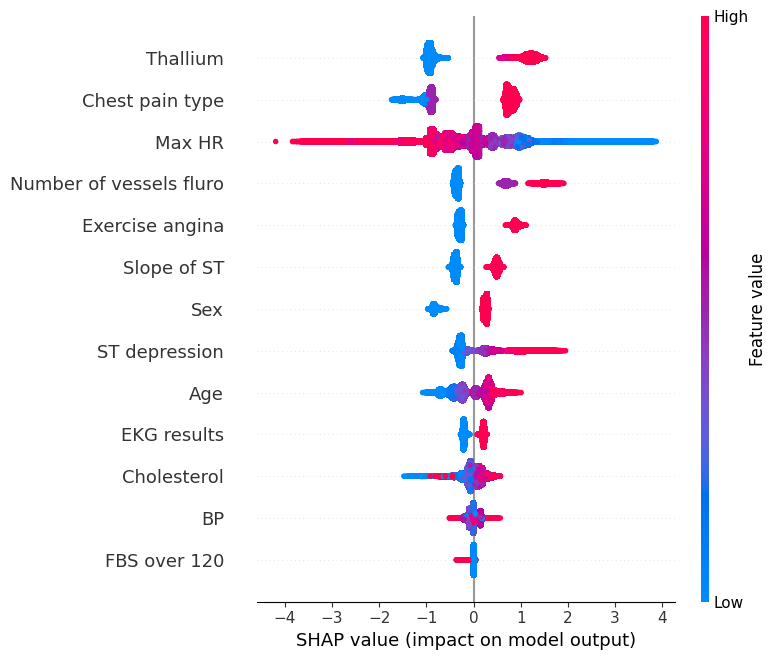

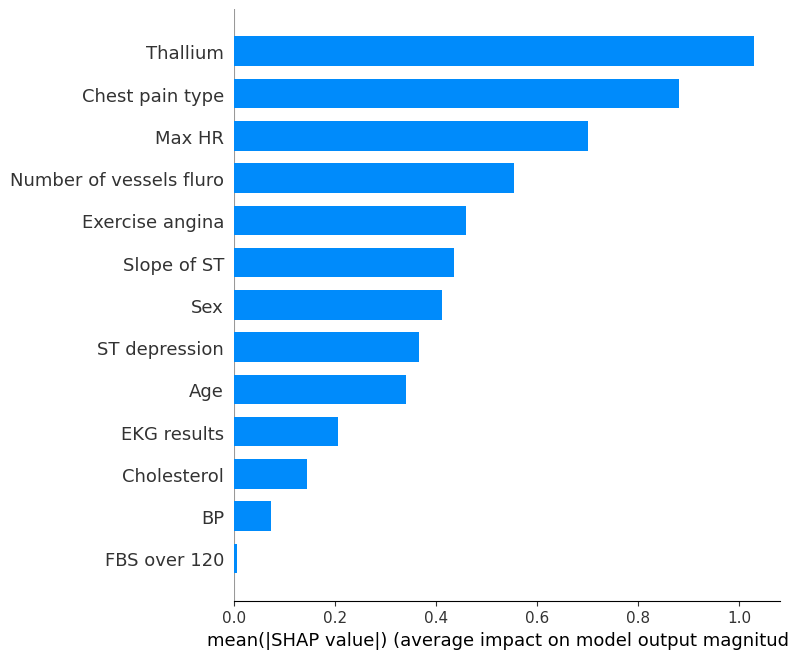

## NUMERIC FEATURE TESTING

In [28]:
import numpy as np
import pandas as pd
from scipy import stats

# Numeric features
numeric_cols = ['Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression']

results_numeric = []

for col in numeric_cols:
    group0 = df[df['Heart Disease'] == 0][col]
    group1 = df[df['Heart Disease'] == 1][col]
    
    # Welch's t-test (unequal variance)
    t_stat, p_value = stats.ttest_ind(group0, group1, equal_var=False)
    
    # Cohen's d
    mean_diff = group1.mean() - group0.mean()
    pooled_std = np.sqrt((group0.std()**2 + group1.std()**2) / 2)
    cohens_d = mean_diff / pooled_std
    
    results_numeric.append({
        'Feature': col,
        't_stat': t_stat,
        'p_value': p_value,
        'Cohens_d': cohens_d
    })

numeric_results_df = pd.DataFrame(results_numeric)
numeric_results_df = numeric_results_df.sort_values(by='Cohens_d', key=abs, ascending=False)

numeric_results_df


,Feature,t_stat,p_value,Cohens_d
3,Max HR,378.738974,0.000000,-0.973405
4,ST depression,-360.505605,0.000000,0.935503
0,Age,-173.449477,0.000000,0.437890
2,Cholesterol,-66.144600,0.000000,0.167266
1,BP,4.122581,0.000037,-0.010431


Here's the same analysis written in plain language:

---

**What separates healthy hearts from diseased ones? Here's what the data actually shows.**

**Max Heart Rate — The #1 Signal**

This is the strongest indicator we found. People with heart disease tend to reach a much lower maximum heart rate during exercise compared to healthy people. The gap between the two groups is so large that it alone can tell a meaningful story. If your heart can't push hard when it needs to, that's a serious red flag.

**ST Depression — A Close Second**

ST depression is a reading from an ECG that shows how the heart responds under stress. In diseased patients, this number is significantly elevated. Combined with Max Heart Rate, these two measurements do most of the heavy lifting in identifying heart disease. They're not just slightly different between groups — they're dramatically different.

**Age — Helpful, But Not the Whole Story**

Older patients do show a higher tendency toward heart disease, and age is a useful clue. But it's a supporting character, not the lead. You can't diagnose someone just by knowing their age.

**Cholesterol — Weaker Than You'd Think**

Here's a surprising one. Cholesterol does show a statistically significant difference between groups, but the actual gap is small. The reason it looks "significant" is because our dataset is enormous — with hundreds of thousands of rows, even a tiny, practically meaningless difference will show up as statistically significant. In reality, cholesterol alone is a weak predictor here.

**Blood Pressure — Essentially Noise**

Despite what you might expect, blood pressure showed almost no meaningful difference between healthy and diseased patients in this dataset. The p-value looks impressive, but again, that's just the large sample size talking. The real-world separation between groups is nearly zero.

---

**The Big Takeaway**

Big datasets can be misleading. When you have 630,000 rows, almost *everything* will appear statistically significant — even things that don't actually matter. That's why we looked at **effect size** (how large the difference actually is), not just p-values. And the honest answer is: **Max Heart Rate and ST Depression are what really matter. Everything else is secondary or noise.**

In [29]:
from scipy.stats import chi2_contingency

categorical_cols = [
    'Sex', 'Chest pain type', 'FBS over 120',
    'EKG results', 'Exercise angina',
    'Slope of ST', 'Number of vessels fluro',
    'Thallium'
]

results_categorical = []

for col in categorical_cols:
    contingency_table = pd.crosstab(df[col], df['Heart Disease'])
    
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    # Cramer's V
    n = contingency_table.sum().sum()
    min_dim = min(contingency_table.shape) - 1
    cramers_v = np.sqrt(chi2 / (n * min_dim))
    
    results_categorical.append({
        'Feature': col,
        'chi2_stat': chi2,
        'p_value': p,
        'Cramers_V': cramers_v
    })

categorical_results_df = pd.DataFrame(results_categorical)
categorical_results_df = categorical_results_df.sort_values(by='Cramers_V', ascending=False)

categorical_results_df


,Feature,chi2_stat,p_value,Cramers_V
7,Thallium,231215.691767,0.000000e+00,0.605813
1,Chest pain type,173770.661665,0.000000e+00,0.525192
6,Number of vessels fluro,135190.518244,0.000000e+00,0.463237
4,Exercise angina,123001.448331,0.000000e+00,0.441860
5,Slope of ST,116357.579387,0.000000e+00,0.429761
0,Sex,73878.222487,0.000000e+00,0.342443
3,EKG results,30248.416205,0.000000e+00,0.219120
2,FBS over 120,709.738192,2.280820e-156,0.033564


**Thallium Scan Results — The Strongest Signal of All**

A thallium scan is a nuclear imaging test that shows how well blood flows through the heart during stress. This turned out to be the single most powerful predictor in the entire dataset. A Cramér's V score above 0.5 is genuinely rare in real medical data — finding one this strong essentially confirms that how your heart performs under a stress test is the clearest window into whether disease is present.

**Chest Pain Type — Surprisingly Powerful**

Not all chest pain is created equal. The *type* of chest pain a patient reports turned out to be an even stronger signal than the number of blocked vessels — which is remarkable. One particular type (Type 4, known as asymptomatic) behaves so differently from the others that treating it as its own separate category, rather than just one point on a scale, is the right call. The data backs this up strongly.

**Number of Vessels Colored — Strong and Straightforward**

This refers to how many major heart vessels show blockage. More blocked vessels means higher disease risk, and the relationship is clean and consistent. It increases in a logical, step-by-step pattern, which means treating it as an ordered scale (0, 1, 2, 3) rather than unrelated categories is the correct approach.

**Exercise-Induced Angina — A Clean Yes/No Split**

Angina is chest pain triggered by physical activity. Whether or not a patient experiences this during exercise is a simple yes or no — and that single binary question draws a surprisingly clear line between healthy and diseased patients.

**Sex — Contributes, But Not a Dominant Factor**

There is a moderate difference in heart disease rates between male and female patients in this dataset. It's worth including as a feature, but it's not a primary driver on its own.

**EKG Results — Mildly Useful**

Resting electrocardiogram readings show a weak-to-moderate relationship with the outcome. Not something to ignore, but not something to rely on heavily either.

**Fasting Blood Sugar — Essentially Useless Here**

This one is straightforward: fasting blood sugar carries almost no predictive power for heart disease in this dataset. The number is so low it's basically indistinguishable from random noise. Including it in a model won't help, and the data now confirms what earlier exploration already suggested.

---

**The Big Picture**

The clearest predictors are the ones tied to how the heart *performs under pressure* — stress test results, chest pain type, vessel blockage, and exercise response. Passive resting measurements like blood sugar and basic EKG readings tell us much less. When building a predictive model, the stress-test related features deserve the most attention.

In [30]:
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression

numeric_cols = ['Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression']

numeric_auc_results = []

for col in numeric_cols:
    X_feature = df[[col]]
    y = df['Heart Disease']
    
    model = LogisticRegression(max_iter=1000)
    model.fit(X_feature, y)
    
    y_pred_proba = model.predict_proba(X_feature)[:, 1]
    auc = roc_auc_score(y, y_pred_proba)
    
    numeric_auc_results.append({
        'Feature': col,
        'AUC': auc
    })

numeric_auc_df = pd.DataFrame(numeric_auc_results).sort_values(by='AUC', ascending=False)
numeric_auc_df


,Feature,AUC
3,Max HR,0.755908
4,ST depression,0.733678
0,Age,0.625654
2,Cholesterol,0.552904
1,BP,0.499514


**If you could only use one measurement to detect heart disease, how well would each one work? Here's the honest answer.**

**Max Heart Rate — Best Single Predictor**

Using Max Heart Rate alone, you can correctly distinguish a diseased patient from a healthy one about 75% of the time. For a single measurement, that's genuinely impressive. But here's something worth understanding: earlier we said the gap between the two groups was very large (Cohen's d ≈ 0.97), so why isn't the accuracy closer to 90% or higher? Because a large gap between group *averages* doesn't mean the two groups don't *overlap*. Think of it like two overlapping bell curves — the centers are far apart, but the edges still mix together. That overlap is exactly what you saw in the charts during earlier analysis, and this number confirms it mathematically.

**ST Depression — Very Close Behind**

ST depression achieves about 73% accuracy on its own, just slightly behind Max Heart Rate. Interestingly, the gap between healthy and diseased groups was almost identical to Max Heart Rate — yet it ranks slightly lower here. This tells us that Max Heart Rate's values are arranged in a slightly cleaner, more ordered way that makes ranking patients easier. A small but meaningful distinction.

**Age — Helpful, Not Decisive**

Age alone gets you to about 63% accuracy. Better than guessing, and worth including in any model, but far from sufficient on its own. It adds value as part of a bigger picture.

**Cholesterol — Weak, But Not Worthless**

Cholesterol sits at about 55% accuracy — just barely above the 50% line that represents pure chance. It carries a faint signal, but you'd never want to rely on it alone. It might contribute a small improvement when combined with stronger features.

**Blood Pressure — Literally No Better Than a Coin Flip**

At 49.9%, blood pressure as a standalone predictor is essentially random. Flipping a coin would give you the same result. This is the final confirmation of what earlier analysis already suggested: resting blood pressure, on its own, tells you almost nothing useful about whether heart disease is present.

---

**The Clearest Takeaway**

AUC scores cut through the noise and give you a real-world sense of predictive usefulness. Max Heart Rate and ST Depression are doing genuine work. Age chips in modestly. Cholesterol is barely present. And Blood Pressure is just background noise dressed up as a medical measurement.

In [31]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

categorical_cols = [
    'Sex', 'Chest pain type', 'FBS over 120',
    'EKG results', 'Exercise angina',
    'Slope of ST', 'Number of vessels fluro',
    'Thallium'
]

categorical_auc_results = []

for col in categorical_cols:
    X_feature = df[[col]]
    y = df['Heart Disease']
    
    # Build small pipeline per feature
    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), [col])
        ]
    )
    
    model = Pipeline([
        ('preprocess', preprocessor),
        ('clf', LogisticRegression(max_iter=1000))
    ])
    
    model.fit(X_feature, y)
    y_pred_proba = model.predict_proba(X_feature)[:, 1]
    
    auc = roc_auc_score(y, y_pred_proba)
    
    categorical_auc_results.append({
        'Feature': col,
        'AUC': auc
    })

categorical_auc_df = pd.DataFrame(categorical_auc_results).sort_values(by='AUC', ascending=False)
categorical_auc_df


,Feature,AUC
7,Thallium,0.800778
1,Chest pain type,0.768271
6,Number of vessels fluro,0.714848
5,Slope of ST,0.714527
4,Exercise angina,0.698074
0,Sex,0.655460
3,EKG results,0.610083
2,FBS over 120,0.509156


**How well does each patient characteristic, on its own, predict heart disease? Here's what the numbers reveal.**

**Thallium Scan — The Single Most Powerful Feature in the Entire Dataset**

With an AUC of 0.80, the thallium stress test result alone can correctly distinguish diseased from healthy patients 80% of the time. To put that in perspective, anything at or above 0.80 from a single feature is exceptional in real medical data. This one variable essentially structures the entire dataset around itself. If you only knew one thing about a patient, this would be the thing you'd want to know.

**Chest Pain Type — Remarkably Strong, and Better Than Expected**

At 0.77, chest pain type outperforms the number of blocked vessels as a standalone predictor. This keeps reinforcing the earlier observation that Type 4 chest pain behaves completely differently from the other types. That instinct to treat it as its own separate binary category rather than just another point on a scale was right, and the data continues to confirm it. There's a good chance that engineering it that way would push this number even higher.

**Number of Vessels and Slope — Strong Individually, Extraordinary Together**

Both sit around 0.71 on their own — solid but not dominant. However, this is exactly why combining them with the thallium result creates such a powerful signal. Each one is strong in isolation, but when you look at patients through multiple lenses at once, the overlap between those signals starts to identify subgroups with near-certain outcomes. Strong ingredients that become exceptional when combined.

**Exercise-Induced Angina — A Reliable Yes/No Divider**

Just under 0.70, this simple yes-or-no question about chest pain during exercise holds its own as a meaningful discriminator. Clean, binary, and consistent.

**Sex — Moderate but Worth Keeping**

At 0.655, sex contributes a real and meaningful signal. Not a headline feature, but not something to discard either. It adds genuine information when combined with stronger predictors.

**Fasting Blood Sugar — Completely Random**

An AUC of 0.509 means this feature performs no better than randomly guessing. Combined with an effect size near zero, the verdict is final: fasting blood sugar contributes essentially nothing to predicting heart disease in this dataset. It's not a weak feature — it's a non-feature. Including it in a model would add noise without adding value.

---

**The Complete Picture**

You now have AUC scores confirming everything that earlier analysis suggested. Thallium and chest pain type are the undisputed leaders. Vessels, slope, and exercise angina form a strong supporting group. Sex plays a minor but real role. And fasting blood sugar can be confidently set aside. The dataset has a clear hierarchy, and now it's backed by numbers at every level.

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# Selected features
selected_features = ['Thallium', 'Max HR', 'Chest pain type']

X = df[selected_features]
y = df['Heart Disease']

# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'),
         ['Thallium', 'Chest pain type']),
        ('num', 'passthrough', ['Max HR'])
    ]
)

model = Pipeline([
    ('preprocess', preprocessor),
    ('clf', LogisticRegression(max_iter=1000))
])

model.fit(X, y)

y_pred_proba = model.predict_proba(X)[:, 1]

auc = roc_auc_score(y, y_pred_proba)

print("ROC-AUC with Thallium + Max HR + Chest Pain + Number of vessels fluro:", auc)


ROC-AUC with Thallium + Max HR + Chest Pain + Number of vessels fluro: 0.9162857562795893


In [32]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# Selected features
selected_features = ['Thallium', 'Max HR', 'Chest pain type','Number of vessels fluro']

X = df[selected_features]
y = df['Heart Disease']

# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'),
         ['Thallium', 'Chest pain type', 'Number of vessels fluro']),
        ('num', 'passthrough', ['Max HR'])
    ]
)

model = Pipeline([
    ('preprocess', preprocessor),
    ('clf', LogisticRegression(max_iter=1000))
])

model.fit(X, y)

y_pred_proba = model.predict_proba(X)[:, 1]

auc = roc_auc_score(y, y_pred_proba)

print("ROC-AUC with Thallium + Max HR + Chest Pain + Number of vessels fluro:", auc)


ROC-AUC with Thallium + Max HR + Chest Pain + Number of vessels fluro: 0.9300693714491366


In [35]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
import numpy as np

# Features
features = ['Thallium', 'Max HR', 'Chest pain type', 'Number of vessels fluro']
X = df[features]
y = df['Heart Disease']

# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'),
         ['Thallium', 'Chest pain type']),
        ('num', 'passthrough', ['Max HR', 'Number of vessels fluro'])
    ]
)

# Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(max_depth=None, random_state=42),
    "Random Forest": RandomForestClassifier(
        n_estimators=200,
        max_depth=None,
        n_jobs=-1,
        random_state=42
    )
}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    pipeline = Pipeline([
        ('preprocess', preprocessor),
        ('model', model)
    ])
    
    auc_scores = cross_val_score(
        pipeline, X, y,
        cv=skf,
        scoring='roc_auc',
        n_jobs=-1
    )
    
    print(f"{name} CV AUC: {np.mean(auc_scores):.4f} ± {np.std(auc_scores):.4f}")

Logistic Regression CV AUC: 0.9296 ± 0.0007
Decision Tree CV AUC: 0.9317 ± 0.0008
Random Forest CV AUC: 0.9321 ± 0.0008
